In [1]:
import sys
sys.path.insert(0, "./caffe/python/")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import caffe

In [4]:
caffe.set_mode_gpu()
caffe.set_device(0)

In [5]:
net = caffe.Net("./deploy.prototxt", "./snapshot/_iter_10000.caffemodel", caffe.TEST)

In [6]:
net

In [12]:
for layer_name in net._layer_names:
    print(layer_name)

data
conv1
pool1
conv2
pool2
ip1
relu1
ip2
softmax


In [13]:
for blob_name in net._blob_names:
    print(blob_name)

data
conv1
pool1
conv2
pool2
ip1
ip2
softmax


In [14]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="./")

In [15]:
mnist.data.shape

(70000, 784)

In [20]:
mnist.data[0].shape

(784,)

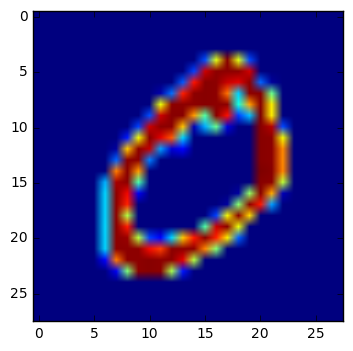

In [23]:
plt.imshow(mnist.data[0].reshape((28,28)))

In [27]:
net.blobs['data'].reshape(1, 1, 28, 28)
net.blobs['data'].data[...] = mnist.data[0].reshape(1,1,28,28)

In [29]:
out = net.forward()

In [30]:
out['softmax'], np.argmax(out['softmax'])

(array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32), 0)

In [33]:
def predict(img):
    net.blobs['data'].reshape(1, 1, 28, 28)
    net.blobs['data'].data[...] = img.reshape(1,1,28,28)
    out = net.forward()
    return out['softmax'], np.argmax(out['softmax'])

In [39]:
def s(img):
    out = predict(img)
    plt.imshow(img.reshape((28,28)))
    plt.title(out[1])

In [43]:
d = mnist.data

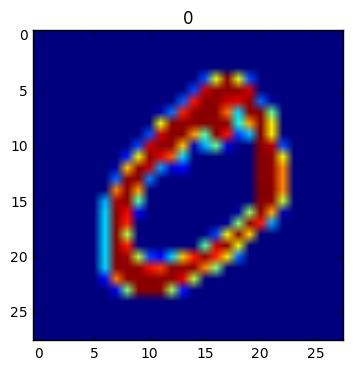

In [44]:
s(d[0])

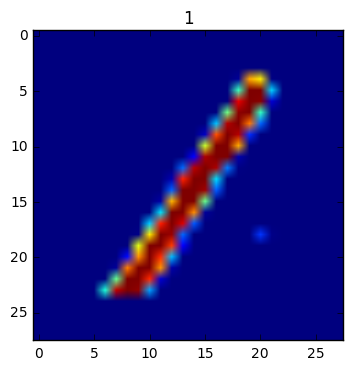

In [46]:
s(d[10000])

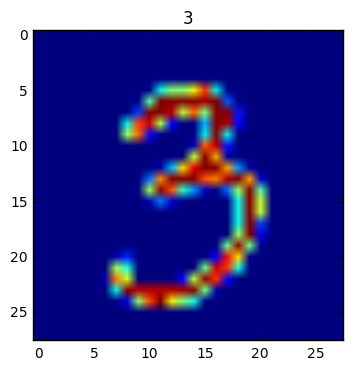

In [47]:
s(d[20000])